# Python Data Analysis Report

## Prevalence and Factors Associated with Hypertension among People Living with HIV (PLWHIV) 

<!-- ### Data Analysis Plan:
1. Introduction
2. Exploratory data analysis
3. Prevalence of hypertension in PLWHIV on ART or not
4. Factors associated with hypertension in PLWHIV on ART or not
5. Conclusion 
6. Recommendations -->

*Boni Maxime Ale*

*NYC Data Science Academy*

*21 February 2022*

## Introduction
Hypertension is a major modifiable risk factor for cardiovascular diseases (CVD) globally. In low- and middle-income settings, including sub-Saharan Africa (SSA), hypertension prevalence has been increasing rapidly over the past several decades. The World Health Organization (WHO) estimates that 46% of individuals >25 years in SSA have hypertension, with rising rates due to demographic transitions that have led to sedentary lifestyles, smoking, harmful alcohol use and consumption of processed foods [1–3]. Estimates of hypertension prevalence in Kenya are high (ranging from 12.6–36.9%) with higher rates in urban areas [1, 4, 5]. Older age, higher body mass index (BMI), alcohol consumption, cigarette smoking, and higher socioeconomic status have been associated with hypertension in previous studies in Kenya [5–7].

However, hypertension diagnosis and treatment are often delayed due to its asymptomatic nature, leading to increased risk of complications and mortality [8]. In SSA, screening, diagnosis, and treatment remain inadequate [9] and a recent study found that 40% of individuals with hypertension in East and West Africa were unaware of their status. The WHO 2017 report on non-communicable diseases (NCD) risk factors identified hypertension as the leading cause of death across income levels [10]. In 2015, hypertension caused an estimated 7.5 million deaths, accounting for 12.8% of all deaths globally [11]. In particular, sub-Saharan Africa (SSA) is facing a dual burden of communicable and non-communicable diseases, including CVD and cancers, with fewer resources for managing NCD [1, 12, 13].

The widespread use of antiretroviral therapy (ART) in SSA has resulted in a near normal life expectancy among persons with HIV (PWH); overall approximately 76% of PWH in SSA are virally suppressed [14]. This increased lifespan, however, may lead to an increased risk of NCD, including hypertension, due to the HIV virus and ART toxicity [14–17]. Studies on hypertension in PWH have shown varied results, some showing higher prevalence of hypertension while others showing no differences or lower prevalence of hypertension among PWH [18, 19]. The majority of studies have included PWH who are ART naïve or on ART but with poorly controlled viral loads compared to HIV-negative individuals in SSA [15, 18, 20, 21]. Data are lacking among PWH who are virally suppressed on ART. We sought to estimate the prevalence of hypertension among virally suppressed PWH on long-term ART compared to HIV-negative adults in western Kenya and identify factors associated with hypertension. These data can help guide prevention strategies and inform allocation of resources for integrated hypertension and HIV management.

## 1. Objectives :

### 1.1. Primary Objective


### 1.2. Secondary Objective


## 2. Materials and Methods

### 2.1. Study design and Setting 


### 2.2. Definition of variables



### 2.3. Statistical Analysis

## 3. Results

### 3.1. Exploratory Data Analysis

In [1]:
## Import library 
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import matplotlib
import seaborn as sns
import plotly
import plotly.express as px
plotly.offline.init_notebook_mode(connected = True)
#import plotly.graph_objects as go

In [2]:
## Loading data
hiv = pd.read_csv("dataset_plos.csv", 
                 # index_col = "year", 
                  parse_dates = True)

## check the first 5 observations of the data set
hiv.head(5)
#print(hiv.info())

,year,sex,age,priorhivtest,treatment,hivresult,hivnew,cd4_cat,bp_cat,bmi_cat,stisymptoms,tbsymptoms,diabsymptoms
0,2008,1.0,49.0,0.0,NaN,0.0,0.0,NaN,5.0,3.0,0,0,0
1,2008,1.0,20.0,0.0,NaN,0.0,0.0,NaN,2.0,2.0,0,0,0
2,2008,2.0,29.0,0.0,NaN,0.0,0.0,NaN,2.0,4.0,0,0,0
3,2008,2.0,38.0,1.0,NaN,0.0,0.0,NaN,1.0,4.0,0,0,0
4,2008,1.0,32.0,0.0,NaN,0.0,0.0,NaN,5.0,2.0,0,0,0


In [3]:
## let's create a copy of hiv dataset for data wrangling
hiv2 = hiv.copy()

In [4]:
## let's convert the 7 modalities of bp_cat into two (normal and high)
conversion_dictionary = {1 : "Normal",
                        2: "Normal",
                        3: "Normal",
                        4 : "High",
                        5 : "High",
                        6 : "High",
                        7 : "Normal"
                        }

hiv2['bp_cat2'] = hiv2['bp_cat'].replace(conversion_dictionary)

## Age groups
#print(hiv2["age"].value_counts())
bins = [12, 20, 30, 40, 50, 60, 70]
labels = ["12-20", "20-30", "30-40", "40-50", "50-60", "60+"]
hiv2["age_group"] = pd.cut(hiv2["age"], bins = bins, labels = labels, right = False)

## change bmi_cat data type 
hiv2['bmi_cat2'] = hiv2['bmi_cat'].astype('category')
## rename bmi category
hiv2['bmi_cat2'] = hiv2['bmi_cat2'].cat.rename_categories({1: "Underweight",
                                                          2:"Normal weight",
                                                          3:"Overweight",
                                                          4:"Obese"})

## let's convert the 4 modalities of treatment into two 
conversion_dictionary_trt = {1 : "On ART",
                             2 : "Not on ART",
                             3 :  "Not on ART",
                             4 : "Not on ART"}

hiv2['trt'] = hiv2['treatment'].replace(conversion_dictionary_trt)

## Gender
## change sex data type 
hiv2['sex'] = hiv2['sex'].astype('category')
## rename gender category
hiv2['sex'] = hiv2['sex'].cat.rename_categories({2:"female",1: "male"})

# ## let's decribe the number of male and female 
# print(hiv2["sex"].value_counts())

# ## and get there percentage
# print(hiv2["sex"].value_counts(normalize = True))


hiv2.head()



,year,sex,age,priorhivtest,treatment,hivresult,hivnew,cd4_cat,bp_cat,bmi_cat,stisymptoms,tbsymptoms,diabsymptoms,bp_cat2,age_group,bmi_cat2,trt
0,2008,male,49.0,0.0,NaN,0.0,0.0,NaN,5.0,3.0,0,0,0,High,40-50,Overweight,NaN
1,2008,male,20.0,0.0,NaN,0.0,0.0,NaN,2.0,2.0,0,0,0,Normal,20-30,Normal weight,NaN
2,2008,female,29.0,0.0,NaN,0.0,0.0,NaN,2.0,4.0,0,0,0,Normal,20-30,Obese,NaN
3,2008,female,38.0,1.0,NaN,0.0,0.0,NaN,1.0,4.0,0,0,0,Normal,30-40,Obese,NaN
4,2008,male,32.0,0.0,NaN,0.0,0.0,NaN,5.0,2.0,0,0,0,High,30-40,Normal weight,NaN


In [5]:
## data cleaning 
hiv3 = hiv2.dropna(subset = ["bp_cat2", "sex", "bmi_cat"])

hiv4 = hiv3.loc[hiv3["bp_cat2"]== "High"]

In [6]:
## Treament group ART and non ART
## let's convert the 7 modalities of bp_cat into two (normal and high)
conversion_dictionary_trt = {1 : "On ART",
                             2 : "Not on ART",
                             3 :  "Not on ART",
                             4 : "Not on ART"}

hiv2['trt'] = hiv2['treatment'].replace(conversion_dictionary_trt)

# ## let's see the frequency in each group
# print(hiv2['trt'].value_counts())

# print(hiv2['trt'].value_counts(normalize = True))

### 3.2. Prevalence of Hypertension

In [7]:
## Blood Pressure 
## let's convert the 7 modalities of bp_cat into two (normal and high)
conversion_dictionary = {1 : "Normal",
                        2: "Normal",
                        3: "Normal",
                        4 : "High",
                        5 : "High",
                        6 : "High",
                        7 : "Normal"
                        }

hiv2['bp_cat2'] = hiv2['bp_cat'].replace(conversion_dictionary)

# ## let's see the frequency in each group
# print(hiv2["bp_cat2"].value_counts())

# print(hiv2["bp_cat2"].value_counts(normalize = True))

In [8]:
boni = hiv2["bp_cat2"].value_counts(normalize = True) 
pd.DataFrame(round(boni * 100, 2))

,bp_cat2
Normal,79.45
High,20.55


There are 20.55 % of PLWHIV who has hypertension. This is considerable and not very different to the general population in Cape Town in SA

In [9]:
prev_year = hiv2.groupby("year")["bp_cat2"].value_counts(normalize = True)
prev_year = round(prev_year*100, 2)

In [10]:
prev_year_bp = hiv2.groupby("year")["bp_cat2"].value_counts(normalize = True)
prev_year_bp = pd.DataFrame(round(prev_year_bp*100, 2))
prev_year_bp.columns = ["Prevalence of Hypertension"]
prev_year_bp
prev_year_bp = prev_year_bp.reset_index()
prev_year_bp = prev_year_bp.loc[prev_year_bp["bp_cat2"]=="High"]
prev_year_bp = prev_year_bp.sort_values(by = ['Prevalence of Hypertension'])
prev_year_bp

,year,bp_cat2,Prevalence of Hypertension
3,2009,High,16.77
13,2015,High,18.32
1,2008,High,18.69
15,2016,High,19.55
9,2012,High,20.03
11,2014,High,22.57
5,2010,High,22.68
7,2011,High,25.30


In [11]:
## Let's see the prevalence of hypertension over the year
fig_prev = px.bar(prev_year_bp,
                        x = "year",
                        y = "Prevalence of Hypertension", 
                  #color = "year",
            barmode = "group",
           # facet_col = "year",
            template="simple_white",
            title = "Prevalence of hypertension over the year",
                   text_auto='.4s'
                       )
fig_prev.update_yaxes(title_text = "Frequency")
fig_prev.update_xaxes(categoryorder = 'array', categoryarray= ['2013','2009','2015','2008','2016', '2012', '2014', '2010', '2011'])
fig_prev.update_traces(textfont_size = 12, textangle = 0, textposition = "outside", cliponaxis = False)
fig_prev.show()

### 3.2.1. Prevalence of Hypertension by age group

In [12]:
## Prevalence of HTN by age group
pd.crosstab(hiv2["age_group"], hiv2["bp_cat2"], margins = True)

bp_cat2,High,Normal,All
age_group,,,
12-20,245,5040,5285
20-30,1613,12810,14423
30-40,2499,8472,10971
40-50,2434,4838,7272
50-60,1494,2319,3813
60+,511,827,1338
All,8796,34306,43102


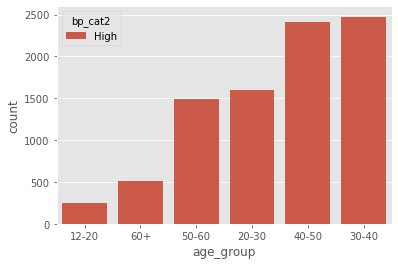

In [13]:

## graphical visualisation of Prevalence of HTN by age group
bp_age_group = sns.countplot(x = "age_group",
              order = hiv4["age_group"].value_counts(ascending= True).index,
              hue = "bp_cat2", 
              data = hiv4);

### 3.2.2. Prevalence of Hypertension by gender

In [14]:
## Prevalence of HTN by gender
pd.crosstab(hiv2["sex"], hiv2["bp_cat2"], margins = True)

bp_cat2,High,Normal,All
sex,,,
male,4586,17000,21586
female,4362,17585,21947
All,8948,34585,43533


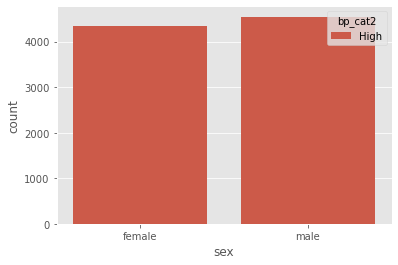

In [15]:
## graphical visualisation of Prevalence of HTN by gender
bp_sex = sns.countplot(x = "sex",
              order = hiv4['sex'].value_counts(ascending = True).index,
              hue = "bp_cat2", 
              data = hiv4);
# abs_values = hiv2['bp_cat2'].value_counts(ascending = False)
# rel_values = hiv2['bp_cat2'].value_counts(ascending = False, normalize = True).values * 100
# lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]
# bp_sex.bar_label(container= bp_sex.containers[0], labels = lbls)

In [16]:
# ## Let's see the prevalence of hypertension by gender over the year
# fig = px.bar(hiv4, x="bp_cat2", color="sex",
#             barmode = "group",
#             facet_col = "year",
#             template="simple_white",
#             title="Prevalence of hypertension by gender over the year")
# fig.show()

### 3.2.3. Age mean in PLWHIV with HTN by gender

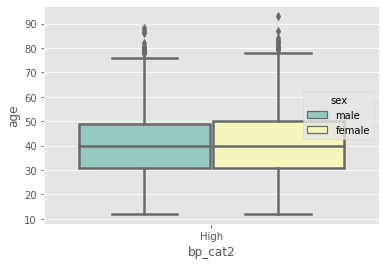

In [17]:
## let's see the proportion of hypertension by age and gender
bp_age_sex = sns.boxplot(x = "bp_cat2", y = "age", hue = "sex", data = hiv4, linewidth=2.5, palette="Set3")

This means that that the mean age of PLWHIV having a high blood pressure among male and female  is similar.

### 3.2.4. Prevalence of Hypertension by CD4 count category

In [18]:
## Prevalence of HTN by CD4 count category
pd.crosstab(hiv2["cd4_cat"], hiv2["bp_cat2"], margins = True)

bp_cat2,High,Normal,All
cd4_cat,,,
1.0,7,26,33
2.0,157,485,642
3.0,138,436,574
4.0,158,514,672
5.0,275,848,1123
All,735,2309,3044


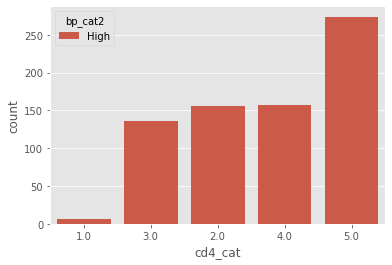

In [19]:
### Visualisation of Prevalence of HTN by CD4 Category
bp_cd4 = sns.countplot(x = "cd4_cat",
              order = hiv4["cd4_cat"].value_counts(ascending = True).index,
              hue = "bp_cat2", 
              data = hiv4);

PLWHIV with CD4 at 500 are patient with controlled HIV. Unfortunately, they are the one with higer prevalence of hypertension. This means that even though an HI patient may be controlled for his HIV, he could be battling with Hypertension without knowing. 

### 3.2.5. Prevalence of HTN by Body mass index category

In [20]:
## let's see the proportion of hypertension by Body mass index category
pd.crosstab(hiv2["bmi_cat2"], hiv2["bp_cat2"], margins = True)

bp_cat2,High,Normal,All
bmi_cat2,,,
Underweight,153,1446,1599
Normal weight,3050,17495,20545
Overweight,2291,7518,9809
Obese,3383,7805,11188
All,8877,34264,43141


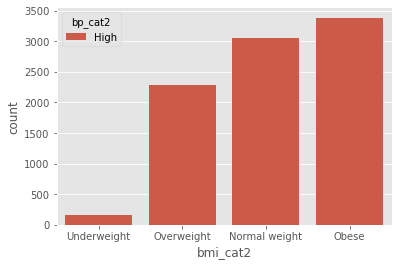

In [21]:

bp_bmi = sns.countplot(x = "bmi_cat2",
              order = hiv4['bmi_cat2'].value_counts(ascending = True).index,
              hue = "bp_cat2", 
              data = hiv4);

In [22]:
## let's see the proportion of hypertension among PLWHIV on ART and those not on ART
pd.crosstab(hiv2["trt"], hiv2["bp_cat2"], margins = True)

bp_cat2,High,Normal,All
trt,,,
Not on ART,285,1070,1355
On ART,215,871,1086
All,500,1941,2441


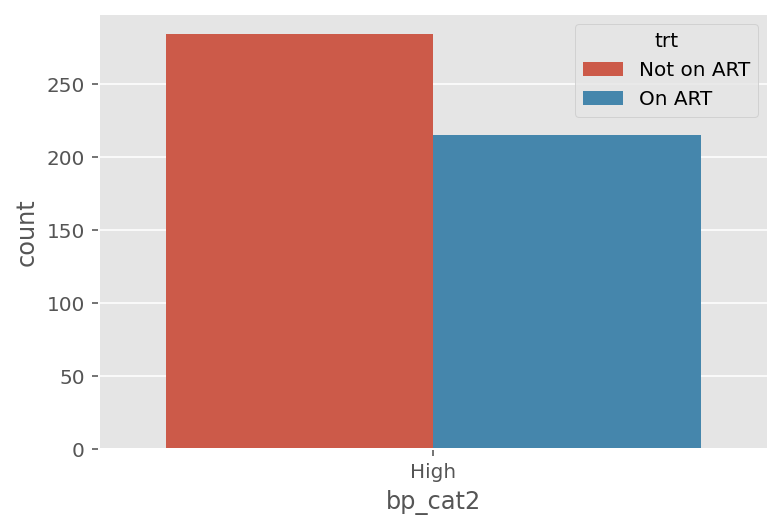

In [23]:
%config InlineBackend.figure_format = 'retina'
bp_bmi = sns.countplot(x = "bp_cat2",
              order = hiv4['bp_cat2'].value_counts(ascending= True).index,
              hue = "trt", 
              data = hiv4);

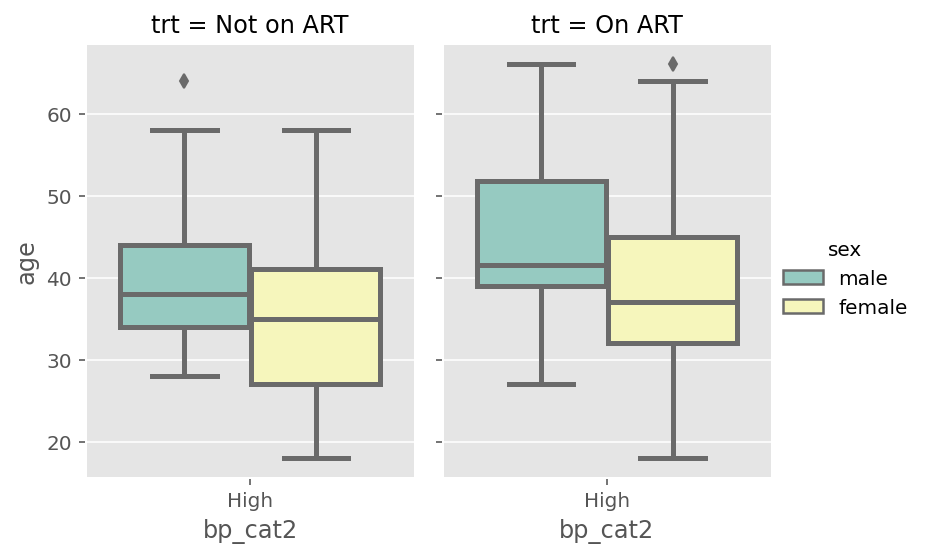

In [24]:
bp_bmi_sex = sns.catplot(x = "bp_cat2", y = "age",hue = "sex", data = hiv4, col = "trt",
...                 kind="box",
...                 height=4, aspect=.7,
                    linewidth=2.5,
                    palette="Set3");
